In [1]:
from keras.applications import VGG16
#Load the VGG model
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(256,256, 3))

Using TensorFlow backend.


In [2]:
# Freeze the layers except the last 4 layers
for layer in vgg_conv.layers[:-4]:
    layer.trainable = False
 
# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f6acc4dfb38> False
<keras.layers.convolutional.Conv2D object at 0x7f6acc4fc828> False
<keras.layers.convolutional.Conv2D object at 0x7f6a9bba66d8> False
<keras.layers.pooling.MaxPooling2D object at 0x7f6a9bae7390> False
<keras.layers.convolutional.Conv2D object at 0x7f6a9bb017b8> False
<keras.layers.convolutional.Conv2D object at 0x7f6a9bb17748> False
<keras.layers.pooling.MaxPooling2D object at 0x7f6a9baab978> False
<keras.layers.convolutional.Conv2D object at 0x7f6a9bac2a90> False
<keras.layers.convolutional.Conv2D object at 0x7f6a9ba6c390> False
<keras.layers.convolutional.Conv2D object at 0x7f6a9ba84dd8> False
<keras.layers.pooling.MaxPooling2D object at 0x7f6a9ba32a58> False
<keras.layers.convolutional.Conv2D object at 0x7f6a9ba49e80> False
<keras.layers.convolutional.Conv2D object at 0x7f6a9ba5dcf8> False
<keras.layers.convolutional.Conv2D object at 0x7f6a9b7e16d8> False
<keras.layers.pooling.MaxPooling2D object at 0x7f6a9b78f358>

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Activation
import keras.backend as K
from keras import optimizers
import numpy as np
import h5py
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
import keras
from keras.layers import Conv3D, MaxPooling3D, UpSampling3D, Activation, BatchNormalization, PReLU, Deconvolution3D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.utils import plot_model


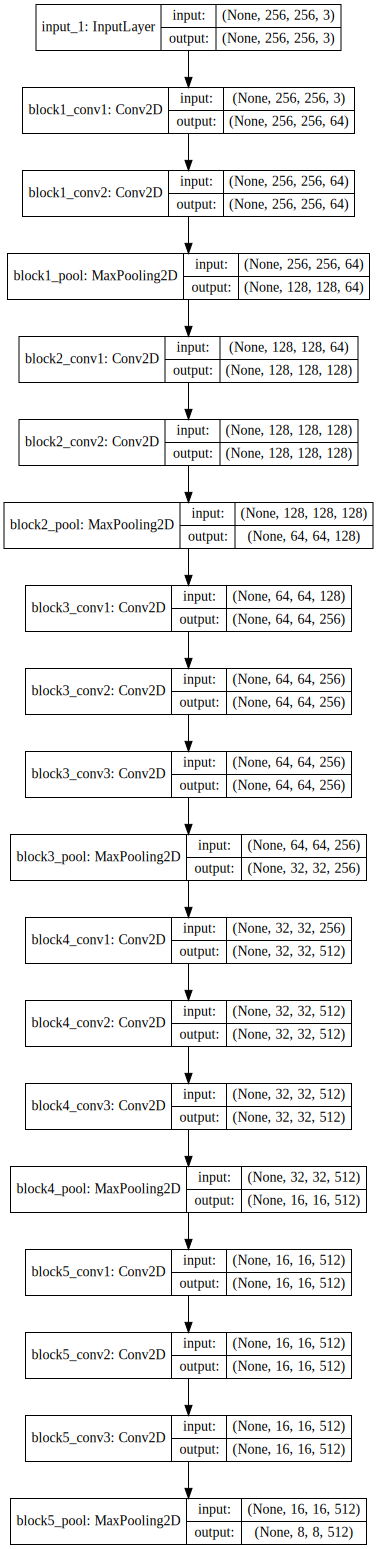

In [4]:
SVG(model_to_dot(vgg_conv, show_shapes=True).create(prog='dot', format='svg'))

In [5]:
vgg_conv.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0         
__________

In [6]:
from keras import models
from keras import layers
from keras import optimizers
 
# Create the model
model = models.Sequential()
 
# Add the vgg convolutional base model
model.add(vgg_conv)
 
# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 8, 8, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              33555456  
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 3075      
Total params: 48,273,219
Trainable params: 40,637,955
Non-trainable params: 7,635,264
_________________________________________________________________


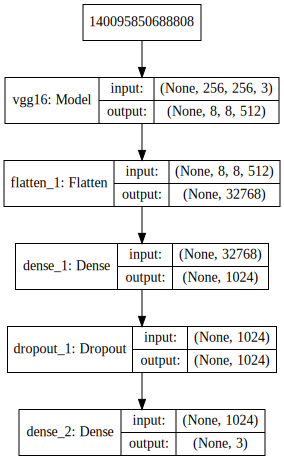

In [8]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))